The purpose of this notebook is to utilize TF-IDF vectorization in topic modeling, using the new_df dataframe built in final_dataframe_cleanup.ipynb.

Importing packages:

In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10

Picking in Data:

In [2]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [3]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


# TF-IDF Vectorizer

For the next round of topic modeling, I will be using TF-IDF vectorizer, to compare the results.

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute']

In [174]:
vectorizer = TfidfVectorizer(stop_words=stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [175]:
X = new_df[new_df.line_length >= 30]['string']
tfi_model = vectorizer.fit_transform(X)

In [176]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [177]:
tf_term_document_matrix.shape

(10278, 15947)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [178]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [179]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(10278, 5)

Pulling the top 10 words for each of the k topics:

In [180]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-15:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['thing', 'think', 'back', 'million', 'america', 'economy', 'need', 'work', 'know', 'got', 'make', 'job', 'get', 'people', 'going']


Topic 2:
['raise', 'code', 'money', 'increase', 'social', 'middle', 'billion', 'budget', 'rate', 'pay', 'plan', 'income', 'percent', 'cut', 'tax']


Topic 3:
['million', 'doctor', 'get', 'drug', 'universal', 'people', 'affordable', 'company', 'system', 'medicare', 'cost', 'plan', 'insurance', 'care', 'health']


Topic 4:
['iraq', 'first', 'issue', 'believe', 'time', 'military', 'say', 'world', 'right', 'one', 'war', 'united', 'state', 'think', 'would']


Topic 5:
['life', 'money', 'choice', 'student', 'every', 'need', 'family', 'college', 'public', 'parent', 'kid', 'teacher', 'education', 'child', 'school']




In [181]:
tf.shape

(5, 15)

Based on this, the 6 topics seem to be about the following: 
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

### Word Cloud Visualization:

In [182]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
full_text = ' '.join(X)

In [17]:
tf_topic_words[0]

['thing',
 'think',
 'back',
 'million',
 'america',
 'economy',
 'need',
 'work',
 'know',
 'got',
 'make',
 'job',
 'get',
 'people',
 'going']

In [18]:
topic_1_text = ' '.join(tf_topic_words[0])
topic_2_text = ' '.join(tf_topic_words[1])
topic_3_text = ' '.join(tf_topic_words[2])
topic_4_text = ' '.join(tf_topic_words[3])
topic_5_text = ' '.join(tf_topic_words[4])

w/ help from this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

Topic 1:

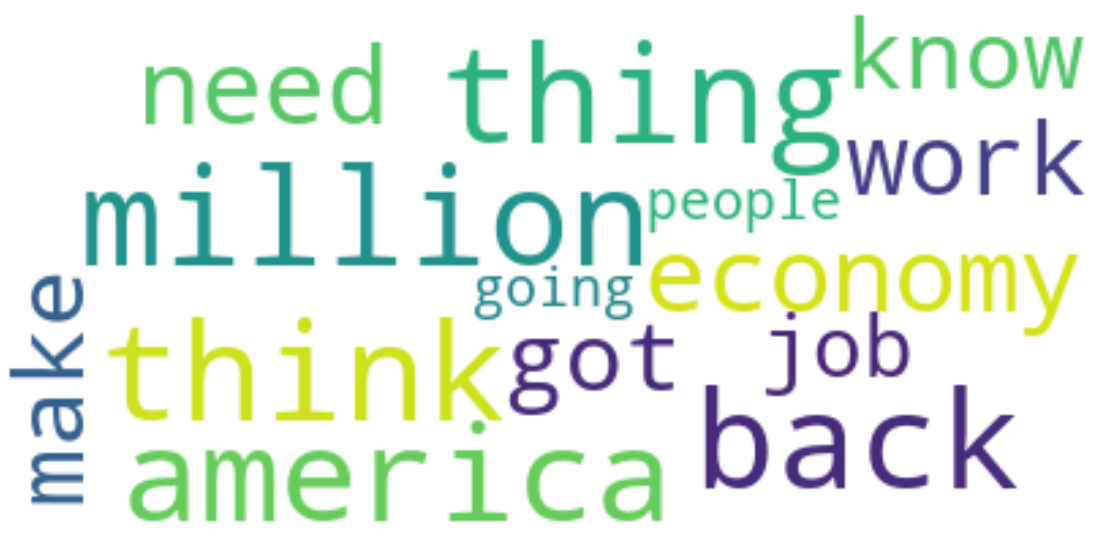

In [19]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_1_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 2:

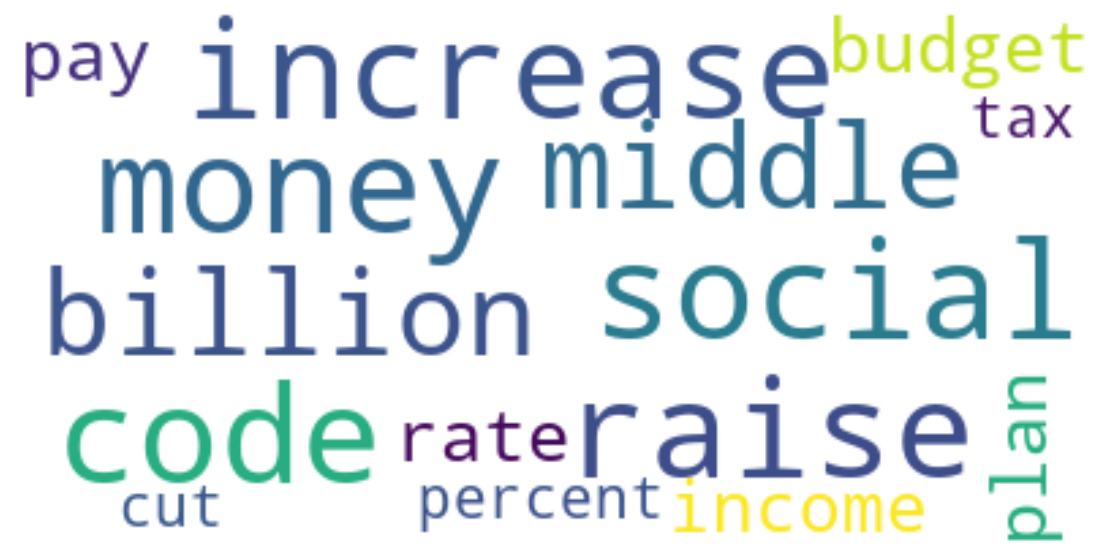

In [20]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_2_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 3:

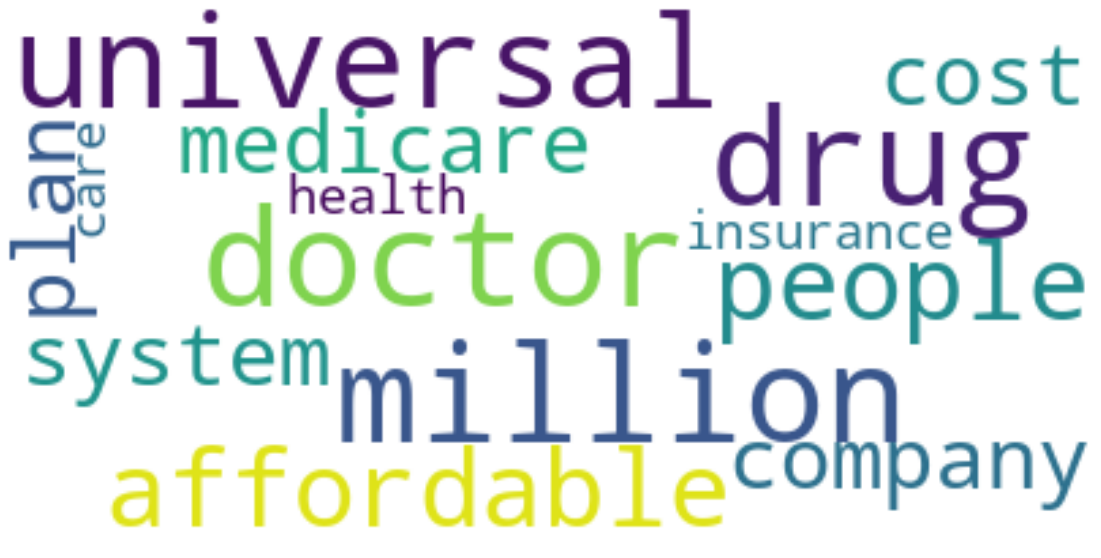

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_3_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 4:

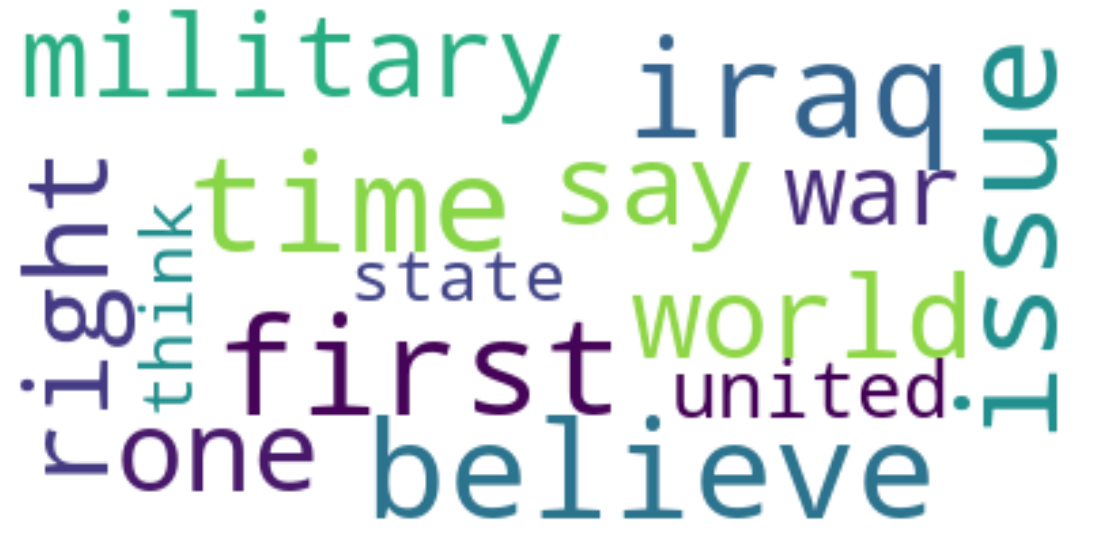

In [22]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_4_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 5:

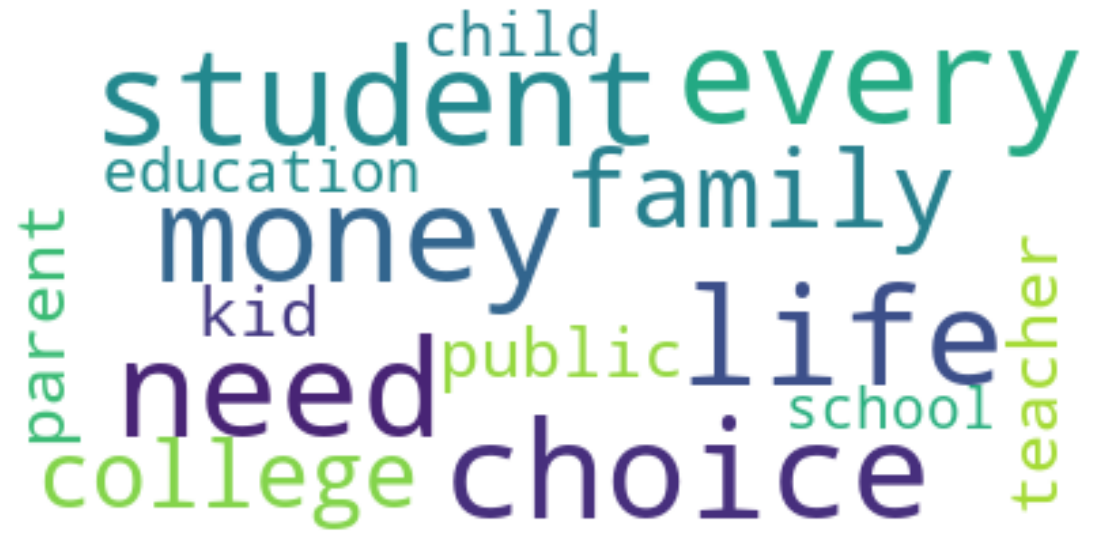

In [23]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_5_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Making a "cooler" image:

In [184]:
from PIL import Image

In [187]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

In [189]:
school_mask = np.array(Image.open("school.png"))

In [190]:
school_mask

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35],
       [36, 36, 36, ..., 36, 36, 36]], dtype=uint8)

In [191]:
def transform_format(val):
    if val ==0:
        return 255
    else:
        return val

In [192]:
transformed_school_mask = np.ndarray((school_mask.shape[0],school_mask.shape[1]), np.int32)

In [193]:
for i in range(len(school_mask)):
    transformed_school_mask[i] = list(map(transform_format, school_mask[i]))

In [194]:
transformed_school_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 35,  35,  35, ...,  35,  35,  35],
       [ 35,  35,  35, ...,  35,  35,  35],
       [ 36,  36,  36, ...,  36,  36,  36]], dtype=int32)

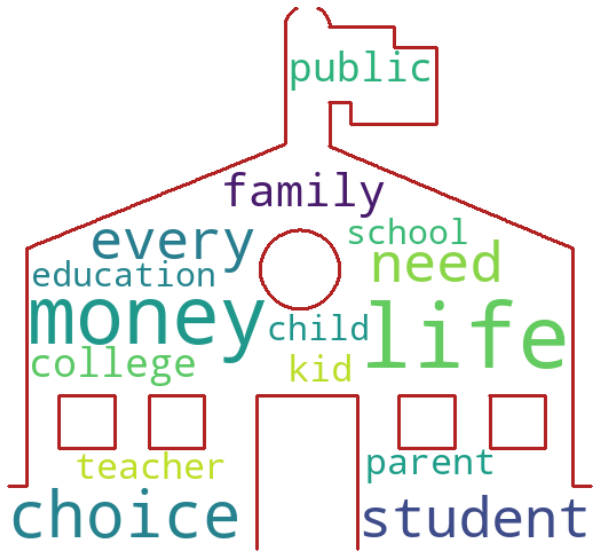

In [195]:
wc = WordCloud(background_color="white", max_words=15, mask=transformed_school_mask, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(topic_5_text)
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Pulling the document-topic matrix:

In [24]:
tf_doc_topic

array([[0.        , 0.        , 0.00168458, 0.04736822, 0.00153315],
       [0.05971317, 0.00125747, 0.00182533, 0.0094451 , 0.        ],
       [0.03336224, 0.0215535 , 0.        , 0.01065857, 0.        ],
       ...,
       [0.05320989, 0.00315384, 0.00473322, 0.        , 0.        ],
       [0.02056672, 0.        , 0.00380494, 0.02292018, 0.        ],
       [0.        , 0.03072258, 0.        , 0.0457029 , 0.        ]])

In [25]:
tf_doc_topic[0][2]

0.0016845840995397471

Mapping these out onto the individual documents;

In [26]:
topic_df = new_df[new_df.line_length >= 40].copy()

In [27]:
topic_df['Topic_1'] = 0
topic_df['Topic_2'] = 0
topic_df['Topic_3'] = 0
topic_df['Topic_4'] = 0
topic_df['Topic_5'] = 0

In [28]:
for i, text in enumerate(topic_df.string):
    topic_df.iloc[i, 10] = tf_doc_topic[i][0]
    topic_df.iloc[i, 11] = tf_doc_topic[i][1]
    topic_df.iloc[i, 12] = tf_doc_topic[i][2]
    topic_df.iloc[i, 13] = tf_doc_topic[i][3]
    topic_df.iloc[i, 14] = tf_doc_topic[i][4]

In [29]:
topic_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...,0.000000,0.000000,0.001685,0.047368,0.001533
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...,0.059713,0.001257,0.001825,0.009445,0.000000
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...,0.033362,0.021553,0.000000,0.010659,0.000000
5,The First Clinton-Bush-Perot Presidential Deb...,"PRESIDENT BUSH: Well, I think one thing that d...",president bush,Commission for Presidential Debates,General-President,1992,Republican,81,Loser,well think one thing distinguishes experience ...,0.044838,0.000000,0.000000,0.039364,0.004102
7,The First Clinton-Bush-Perot Presidential Deb...,"CLINTON: I believe experience counts, but it’s...",clinton,Commission for Presidential Debates,General-President,1992,Democrat,167,Winner,believe experience count ’ everything value ju...,0.071189,0.015037,0.016476,0.016910,0.014702


### EDA Using Topics:

Based on topic modelling above, here are the 5 topics (based on the top words):
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

In [30]:
topics = ['Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education']

In [31]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

In [32]:
topics_over_time = topic_df.groupby([topic_df.Year, topic_df.Speaker_Type]).agg({'Topic_1':'mean','Topic_2':'mean', 'Topic_3':'mean', 'Topic_4':'mean', 'Topic_5':'mean'}).reset_index()

In [33]:
topics_over_time.head()

,Year,Speaker_Type,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,1960,Democrat,0.024560,0.006530,0.004601,0.021238,0.012665
1,1960,Moderator/Other,0.016753,0.005338,0.004554,0.021003,0.004834
2,1960,Republican,0.021923,0.007258,0.005671,0.021276,0.012028
3,1976,Democrat,0.015021,0.021829,0.004048,0.038065,0.008316
4,1976,Moderator/Other,0.011822,0.024853,0.006174,0.034708,0.009389


In [34]:
topics_over_time.shape

(53, 7)

Topics Concentration, by Speaker Type:

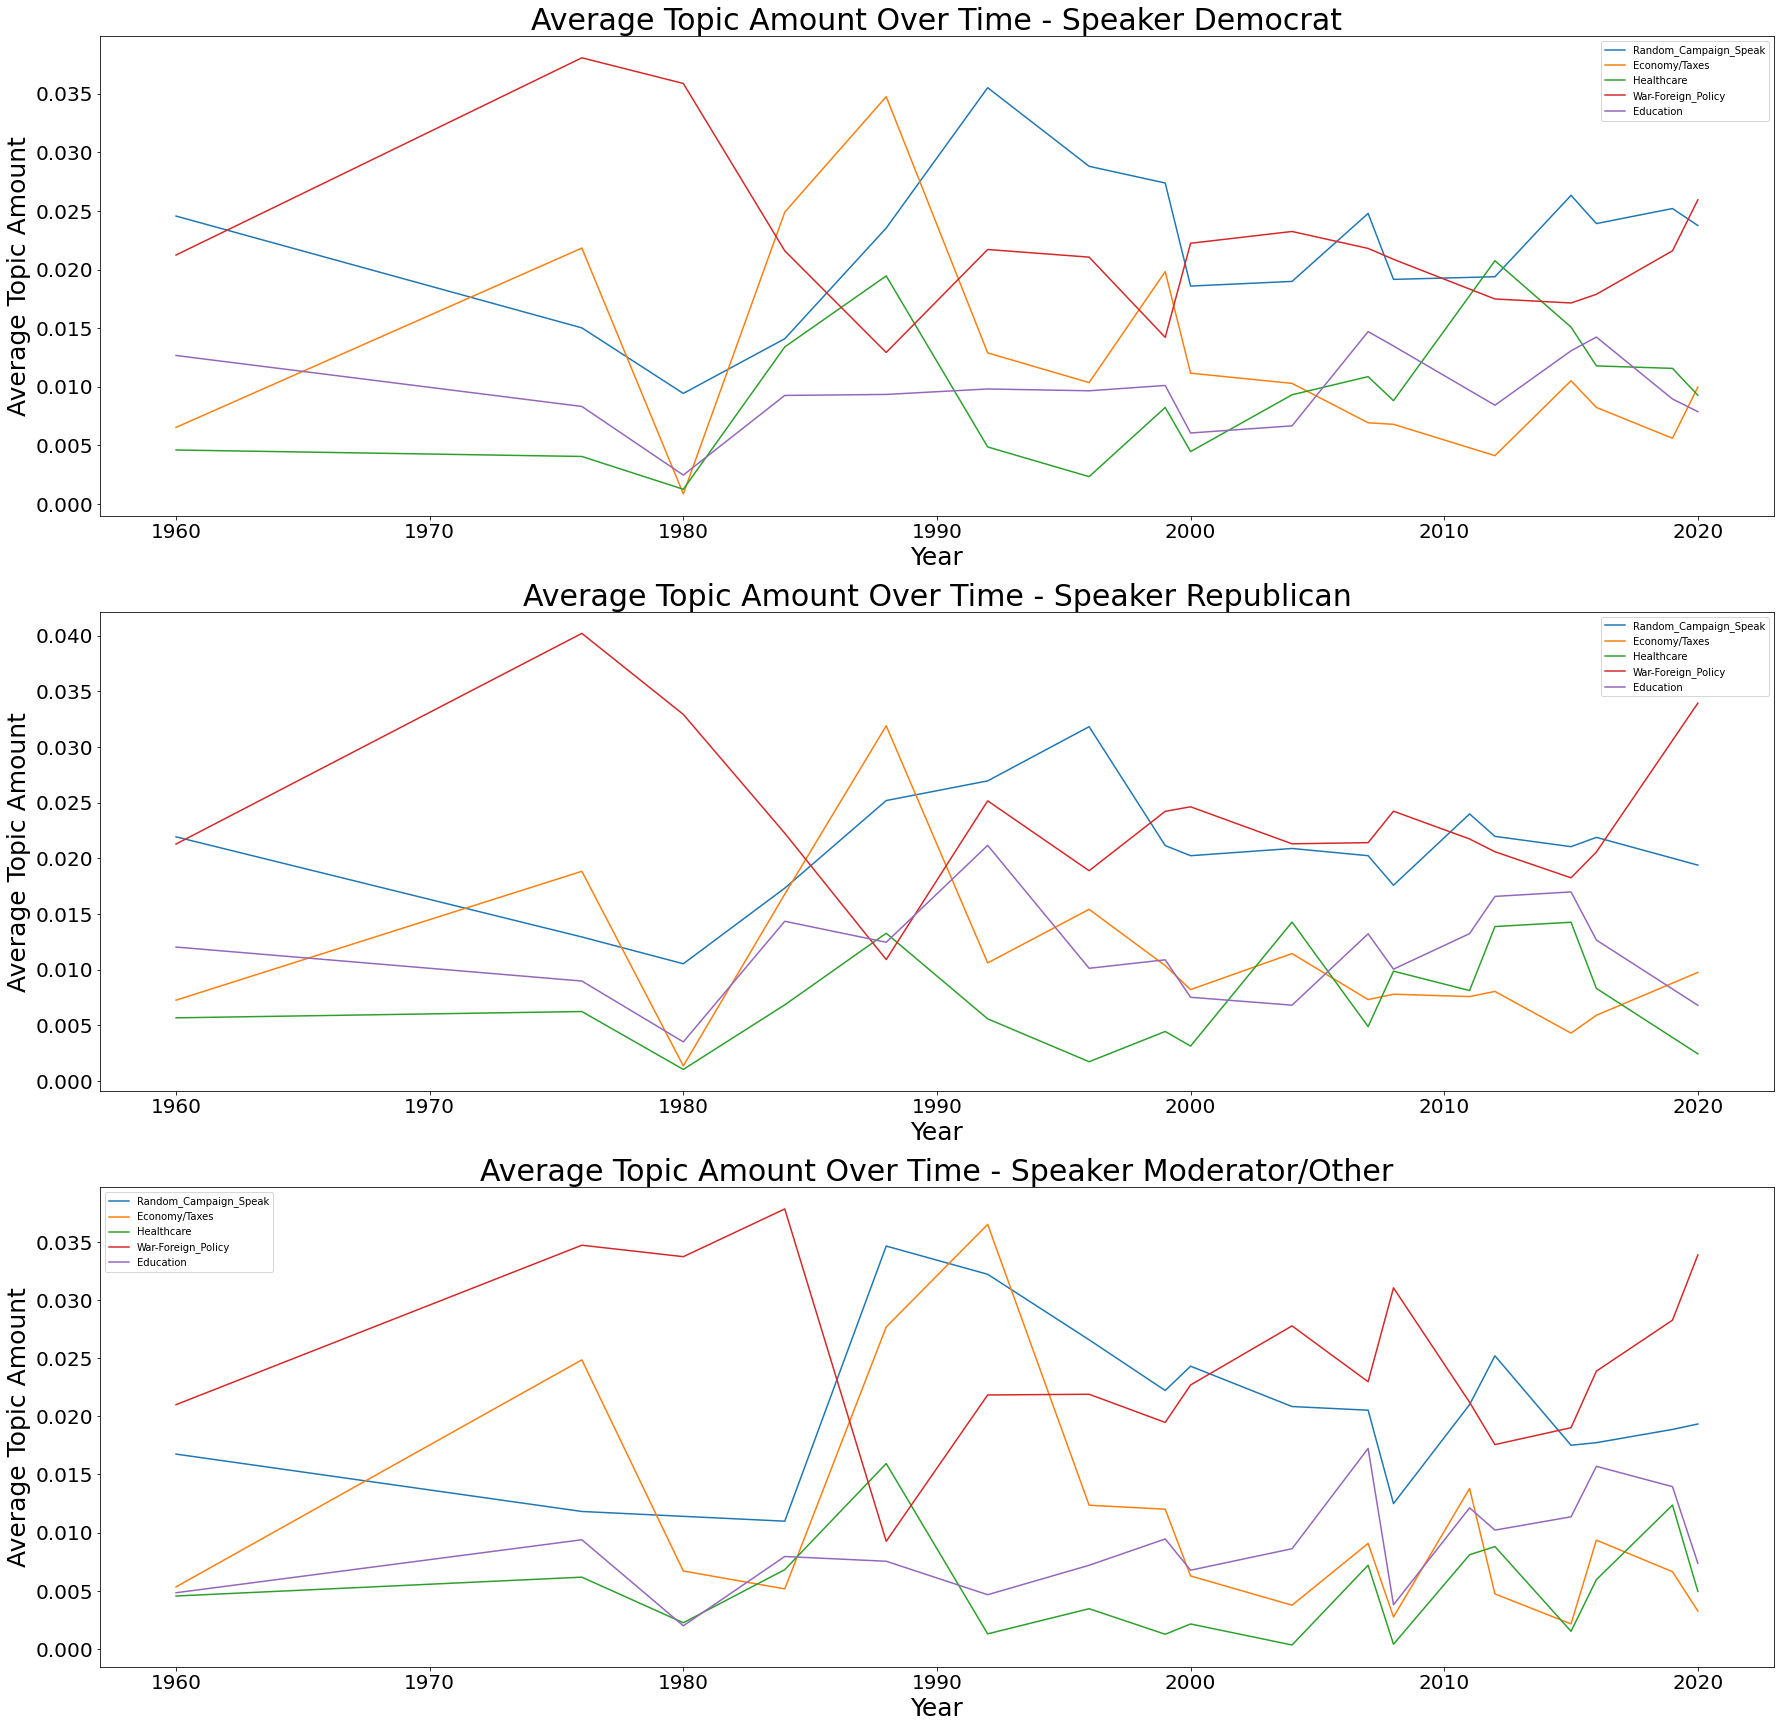

In [35]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, speaker_type in enumerate(types, 1):
    plt.subplot(3,1,i)
    counter = 2
    for topic in topics:
        legend.append(topic)
        x = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, 0]
        y = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, counter]
        legend.append(topic)
        plt.plot(x,y)
        counter += 1
    plt.xlabel('Year', size=25)
    plt.ylabel('Average Topic Amount', size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average Topic Amount Over Time - Speaker {}'.format(speaker_type), size=30)
    plt.legend(('Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education'))

Topic Concentration, by Election Result (i.e. Winner/Loser)

### Topic Modelling via LDA:

In [36]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [37]:
lda_model = LDA(n_components = 5)

In [38]:
lda_doc_topic = lda_model.fit_transform(tf_term_document_matrix)
lda_doc_topic.shape

(10278, 5)

Pulling the top 10 words for each of the k topics:

In [39]:
lda_words = vectorizer.get_feature_names()
lda = lda_model.components_.argsort(axis=1)[:,-12:]
lda_topic_words = [[lda_words[e] for e in l] for l in lda]
for i, words in enumerate(lda_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['hannity', 'washing', 'chong', 'charlie', 'embryonic', 'sean', 'preemptive', 'cell', 'stem', 'il', 'loyalty', 'aleppo']


Topic 2:
['would', 'money', 'percent', 'plan', 'cut', 'job', 'get', 'care', 'going', 'health', 'people', 'tax']


Topic 3:
['fannie', 'follow', 'second', 'catholic', 'mac', 'inspector', 'faith', 'freddie', 'church', 'question', 'hussein', 'saddam']


Topic 4:
['brigade', 'pilot', 'matsu', 'quemoy', 'formosa', 'injured', 'injury', 'english', 'brain', 'planned', 'parenthood', 'court']


Topic 5:
['say', 'state', 'make', 'get', 'need', 'right', 'know', 'one', 'going', 'would', 'think', 'people']




These topics definitely make less sense as of now compared to NMF.

### Topic Modelling via LSA:

For LSA, using TruncatedSVD:

In [40]:
from sklearn.decomposition import TruncatedSVD

Lowering minimum word count to 15:

In [41]:
X = new_df[new_df.line_length >= 10]['string']
tfi_model = vectorizer.fit_transform(X)

In [42]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [43]:
tf_term_document_matrix.shape

(42156, 20881)

In [44]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(tf_term_document_matrix)
lsa.explained_variance_ratio_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-41bcf26811ad>", line 2, in <module>
    doc_topic = lsa.fit_transform(tf_term_document_matrix)
  File "/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_truncated_svd.py", line 204, in fit_transform
    full_var = np.var(X, axis=0).sum()
  File "<__array_function__ internals>", line 5, in var
  File "/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 3621, in var
    return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
  File "/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/numpy/core/_methods.py", line 216, in _var
    ret = umr_sum(x, axis, dtype, out, keepdims)
KeyboardInterrupt

During hand

TypeError: object of type 'NoneType' has no len()

Pulling the top 10 words for each of the k topics:

In [ ]:
tf_words = vectorizer.get_feature_names()
tf = lsa.components_.argsort(axis=1)[:,-12:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

In [ ]:
doc_topic

# TOPIC MODELING ON INDIVIDUAL PARTY PRIMARIES:

I'd like to see if different, more specific topics emerge from Republican and Democrat primaries.

# Republican Primaries:

In [205]:
rep_stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'get', 'republican', 'people', 'party', 'got', 'get', 'issue', 'know', 'think', 'like', 'well', 'need', 'make']

In [206]:
vectorizer = TfidfVectorizer(stop_words=rep_stop, max_df = 0.5)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [207]:
X = new_df[(new_df.line_length >= 15) & (new_df.Debate_Type =='Primary-Republican')]['string']
tfi_model = vectorizer.fit_transform(X)

In [208]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [209]:
tf_term_document_matrix.shape

(14539, 13785)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [214]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [215]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(14539, 5)

Pulling the top 10 words for each of the k topics:

In [216]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-15:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['applause', 'come', 'believe', 'world', 'year', 'back', 'let', 'job', 'united', 'thing', 'time', 'america', 'right', 'state', 'one']


Topic 2:
['job', 'budget', 'corporate', 'economy', 'code', 'money', 'flat', 'spending', 'pay', 'rate', 'income', 'plan', 'percent', 'cut', 'tax']


Topic 3:
['much', 'deal', 'israel', 'war', 'military', 'support', 'go', 'take', 'ask', 'weapon', 'nuclear', 'could', 'iran', 'say', 'would']


Topic 4:
['program', 'market', 'federal', 'take', 'medical', 'money', 'account', 'saving', 'buy', 'plan', 'system', 'cost', 'insurance', 'care', 'health']


Topic 5:
['program', 'see', 'way', 'tell', 'applause', 'take', 'back', 'economy', 'money', 'win', 'say', 'go', 'social', 'security', 'going']




In [217]:
tf.shape

(5, 15)

### Observing these over time:

# Democrat Primaries:

In [219]:
dem_stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute','year', 'applause', 'get', 'make', 'going', 'need', 'well', 'got', 'done', 'make', 'also', 'put', 'would']

In [220]:
vectorizer = TfidfVectorizer(stop_words=dem_stop, max_df=0.5)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [221]:
X = new_df[(new_df.line_length >= 30) & (new_df.Debate_Type =='Primary-Democrat')]['string']
tfi_model = vectorizer.fit_transform(X)

In [222]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [223]:
tf_term_document_matrix.shape

(3353, 9190)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [224]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [225]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(3353, 5)

Pulling the top 10 words for each of the k topics:

In [226]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-15:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['new', 'say', 'like', 'america', 'way', 'thing', 'united', 'time', 'state', 'issue', 'right', 'one', 'know', 'think', 'people']


Topic 2:
['profit', 'coverage', 'million', 'drug', 'affordable', 'system', 'cost', 'people', 'medicare', 'universal', 'company', 'plan', 'insurance', 'care', 'health']


Topic 3:
['university', 'high', 'tuition', 'go', 'debt', 'free', 'student', 'every', 'public', 'teacher', 'kid', 'college', 'education', 'child', 'school']


Topic 4:
['million', 'job', 'social', 'paying', 'wealth', 'money', 'family', 'dollar', 'cut', 'middle', 'class', 'income', 'percent', 'pay', 'tax']


Topic 5:
['vote', 'security', 'nuclear', 'policy', 'world', 'afghanistan', 'end', 'voted', 'home', 'combat', 'military', 'iran', 'troop', 'iraq', 'war']




In [227]:
tf.shape

(5, 15)